In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

## 1) 載入資料集

In [2]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_train['Species']中。
df_train['Class'] = df_train['Species'].map(label_map)

In [4]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


# EDA (Exploratory Data Analysis) 探索式資料分析
主要概念是透過數據統計的方式視覺化資料。做EDA的好處可以從各種面向先了解資料的狀況，以利後續的模型分析。

## 直方圖

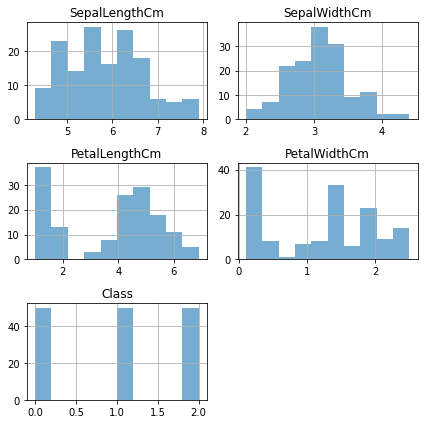

In [5]:
#直方圖 histograms
df_train.hist(alpha=0.6, figsize=(6, 6)) 
plt.tight_layout()
plt.show()

## 關聯分析 (correlation map)

<AxesSubplot:>

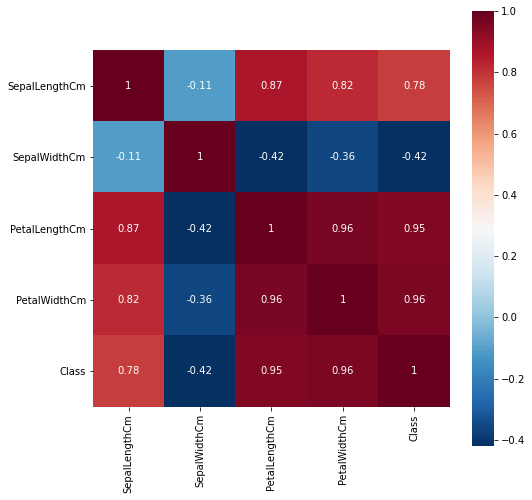

In [8]:
# correlation calculate
corr = df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"

## 箱形圖
透過箱形圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'Class')

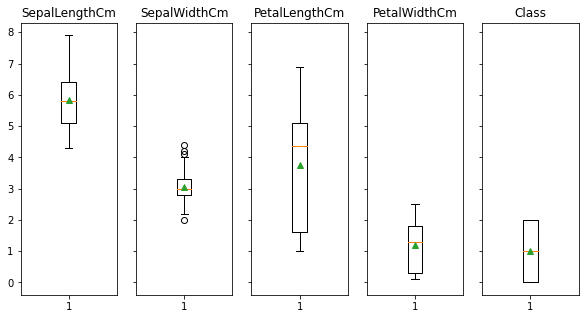

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_train['SepalLengthCm'],showmeans=True)
axes[0].set_title('SepalLengthCm')

axes[1].boxplot(df_train['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_train['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_train['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_train['Class'],showmeans=True)
axes[4].set_title('Class')


